<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Demo-of-Cleaning-Functions" data-toc-modified-id="Demo-of-Cleaning-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Demo of Cleaning Functions</a></span><ul class="toc-item"><li><span><a href="#Columns" data-toc-modified-id="Columns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Columns</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Duplicates</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#Transformations" data-toc-modified-id="Transformations-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Transformations</a></span></li></ul></li></ul></div>

In [1]:
import datetime as dt
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(sys.executable)
print(sys.version)
print(f"Pandas {pd.__version__}")
print(f"Seaborn {sns.__version__}")

C:\Users\r2d4\miniconda3\envs\py3\python.exe
3.8.3 (default, May 19 2020, 06:50:17) [MSC v.1916 64 bit (AMD64)]
Pandas 1.1.3
Seaborn 0.11.0


In [3]:
sys.path.append(str(Path.cwd().parent / 'src'))

In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.style.use('raph-base')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('precision', 2)
pd.set_option('display.max_columns', 30)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)

In [5]:
import src.clean as clean

## Load Data

In [6]:
df = pd.read_csv("../data/realWorldTestData.csv", 
                 low_memory=False, 
                 nrows=1000,
                 usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
                 )

df["target_num"] = np.where(df["target_event"] == "ACTIVE", 1, 0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   car_nr                         1000 non-null   float64
 1   ref_dt                         1000 non-null   object 
 2   target_event                   1000 non-null   object 
 3   NUM_CONSEC_SERVICES            1000 non-null   int64  
 4   SUM_INVOICE_AMOUNT_IN_SERVICE  1000 non-null   float64
 5   SUM_INVOICE_AMOUNT             1000 non-null   float64
 6   NUM_EVENTS                     1000 non-null   int64  
 7   FIRST_EVT                      1000 non-null   object 
 8   LAST_EVT                       1000 non-null   object 
 9   LAST_MILEAGE                   1000 non-null   float64
 10  MEAN_MILEAGE_PER_MNTH          1000 non-null   float64
 11  AVG_DIFF_MNTH                  1000 non-null   int64  
 12  age_mnth                       1000 non-null   in

## Demo of Cleaning Functions 
### Columns

In [8]:
df = clean.prettify_column_names(df)

# Show result
df.columns

Index(['car_nr', 'ref_dt', 'target_event', 'num_consec_services',
       'sum_invoice_amount_in_service', 'sum_invoice_amount', 'num_events',
       'first_evt', 'last_evt', 'last_mileage', 'mean_mileage_per_mnth',
       'avg_diff_mnth', 'age_mnth', 'target_num'],
      dtype='object')

In [9]:
clean.count_dtypes(df)

,# cols
float64,5
object,4
int64,4
int32,1


In [10]:
# `clean.change_dtypes` is not available for the moment. Code sucks ...

In [11]:
df_del = clean.delete_columns(df, cols_to_delete=["target_num", "first_evt"])

assert df_del.shape[1] == (df.shape[1] - 2)

Column target_num successfully deleted.
Column first_evt successfully deleted.


### Missing Values

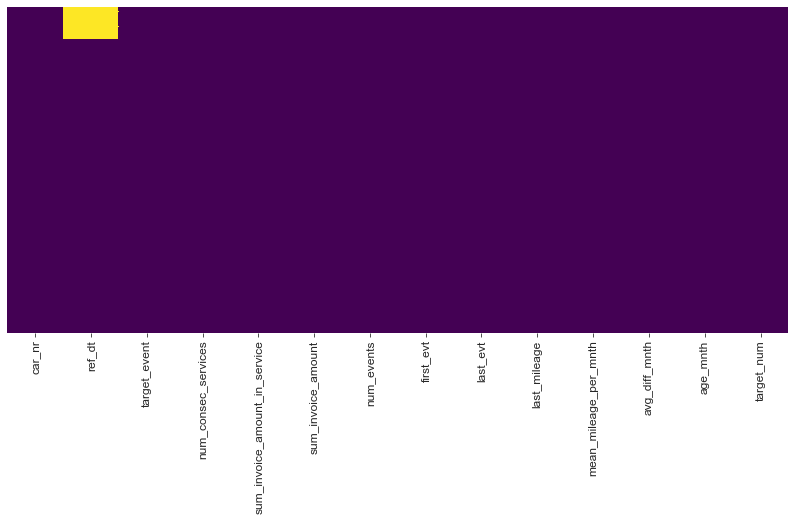

In [12]:
df.loc[:100, "ref_dt"] = np.nan  # create some NaN values

clean.plot_nan(df)

In [14]:
clean.list_nan(df)

,total,prop,dtype
ref_dt,101,10.1%,object


In [ ]:
## clean.handle_nan(df) - IMPLEMENT PLEASE

### Duplicates

In [18]:
clean.list_duplicates(df)

Number of column-wise duplicates per column:
- car_nr: 1 unique duplicated values (2 duplicated rows)
- ref_dt: 231 unique duplicated values (760 duplicated rows)
- target_event: 2 unique duplicated values (1000 duplicated rows)
- num_consec_services: 8 unique duplicated values (998 duplicated rows)
- sum_invoice_amount_in_service: 3 unique duplicated values (956 duplicated rows)
- sum_invoice_amount: 23 unique duplicated values (309 duplicated rows)
- num_events: 32 unique duplicated values (995 duplicated rows)
- first_evt: 189 unique duplicated values (462 duplicated rows)
- last_evt: 251 unique duplicated values (707 duplicated rows)
- last_mileage: 6 unique duplicated values (15 duplicated rows)
- mean_mileage_per_mnth: 1 unique duplicated values (2 duplicated rows)
- avg_diff_mnth: 14 unique duplicated values (998 duplicated rows)
- age_mnth: 100 unique duplicated values (997 duplicated rows)
- target_num: 2 unique duplicated values (1000 duplicated rows)


### Outliers

In [19]:
clean.count_outliers_IQR_method(df, iqr_dist=2)


car_nr:
 - upper cut-off value: 158,944,559.00
 - lower cut-off value: 84,317,216.50
 - Identified outliers: 275
 - of total values: 27.5%

num_consec_services:
 - upper cut-off value: 7.00
 - lower cut-off value: -3.00
 - Identified outliers: 6
 - of total values: 0.6%

sum_invoice_amount_in_service:
 - upper cut-off value: 0.00
 - lower cut-off value: 0.00
 - Identified outliers: 69
 - of total values: 6.9%

sum_invoice_amount:
 - upper cut-off value: 4,930.24
 - lower cut-off value: -3,286.83
 - Identified outliers: 35
 - of total values: 3.5%

num_events:
 - upper cut-off value: 31.75
 - lower cut-off value: -9.50
 - Identified outliers: 14
 - of total values: 1.4%

last_mileage:
 - upper cut-off value: 172,933.25
 - lower cut-off value: -69,011.75
 - Identified outliers: 14
 - of total values: 1.4%

mean_mileage_per_mnth:
 - upper cut-off value: 2,912.81
 - lower cut-off value: -730.05
 - Identified outliers: 19
 - of total values: 1.9%

avg_diff_mnth:
 - upper cut-off value: 9.0

In [20]:
df_outliers, deleted_idx = clean.remove_outliers_IQR_method(
    df,
    outlier_cols=["num_events", "mean_mileage_per_mnth"],
    iqr_dist=2,
    return_idx_deleted=True
)


num_events: 
Rows to remove: 14


mean_mileage_per_mnth: 
Rows to remove: 19


Rows removed in total: 33
(Percentage of original DataFrame: 3.3%)


In [23]:
# Because we set the return_idx_deleted param to true we also got the index values of the deleted rows back

assert len(deleted_idx) == (len(df) - len(df_outliers))
print(deleted_idx)

[257, 405, 282, 283, 801, 418, 422, 40, 552, 300, 306, 307, 180, 309, 59, 192, 833, 836, 710, 200, 841, 75, 334, 718, 80, 210, 980, 599, 730, 739, 885, 758, 887]


### Transformations